In [1]:
from scipy import ndimage, misc
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rnd

## Collect data

In [2]:
# Constants
FROM_FILE = "org_imgs_newcrop.pkl" # Pickle file to collect images from 
TO_FILE = "org_imgs_rotated.pkl" # Name of file to store data to
IMG_SIZE0 = 97 # First dimension of image, should not be changed
IMG_SIZE1 = 90 # Second dimension of image, should not be changed

In [3]:
# Import images to DataFrame
df = pd.read_pickle(FROM_FILE) # Change to correct name of pickle file with images and data

## Random rotations

In [4]:
# Constants
N_ROTATIONS = 5 # Number of rotations per image

In [5]:
df = df[df["Identity"]<5] # Use only a few people

In [6]:
def crop_center(img):
    old_dim0, old_dim1 = img.shape
    x0 = (old_dim0-IMG_SIZE0)//2
    x1 = (old_dim1-IMG_SIZE1)//2
    return img[x0:x0+IMG_SIZE0,x1:x1+IMG_SIZE1]

In [7]:
def rotate_image(img):
    # Constants
    shift0 = int(rnd.gauss(0,5)) # The choice of random function should perhaps be reconsidered
    shift1 = int(rnd.gauss(0,5))
    deg = rnd.gauss(0,45) # Uncomment for gaussian distribution
    # deg = rnd.uniform(0,360) # Uncomment for uniform distribution
    # Necessary modification
    img = np.reshape(img, (IMG_SIZE0,IMG_SIZE1)) # If the input array is flattened
    # Transform the image
    new_img = ndimage.rotate(img, deg, reshape=True, cval=255) # cval gives value to fill added edges with
    new_img = ndimage.shift(new_img, [shift0, shift1], cval=255)
    new_img = crop_center(new_img)
    # plt.imshow(new_img, cmap="gray") # Uncomment to see image
    new_img = new_img.flatten() # Comment out if array should not be flattened
    return new_img

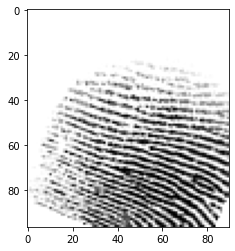

In [41]:
# Create list of rotated images and samples information
rot_images = []
for i in range(len(df)):
    data = df.iloc[i]
    for j in range(N_ROTATIONS):
        img_rot = rotate_image(data[0])
        rot_images.append([img_rot, data[1],data[2],data[3],data[4]])
# Store as DataFrame
new_df = pd.DataFrame(rot_images, columns=["Image","Identity","Gender","Hand","Finger"])

In [23]:
new_df.head(5)

,Image,Identity,Gender,Hand,Finger
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",4,0,0,0
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",4,0,0,0
2,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",4,0,0,0
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",4,0,0,0
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",4,0,0,0


In [ ]:
# Save data as pickle
df.to_pickle(TO_FILE)